In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y

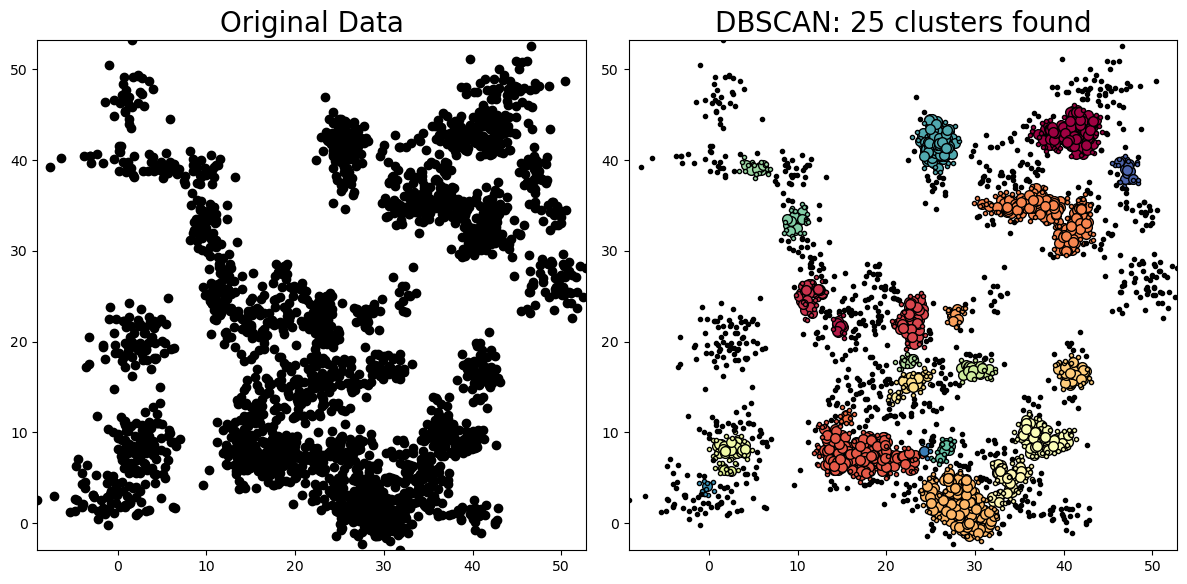

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate some clusters!
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)
# Convert to a single dataset in OpenCV format
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
# Define max_distance (eps parameter in DBSCAN())
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)
# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot up the results!
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)